Title: An alpine landscape generator
Date: 2018-11-05 21:05
Category: GenerativeArt
Tags: Python
Slug: fractal-mountains-with-python
Cover: /posts/img4003/output_3_0.png
Authors: Peter Schuhmacher
Summary: Landscape generation using midpoint displacement in vectorized form

In the late 1980's, the revival of **chaotic systems, [fractals](https://en.wikipedia.org/wiki/Fractal)** and **strange atractors** was raising high expectations that some complex physical systems like turbulence or financial systems like the stock exchange markets could be described with. This transfer failed however.

But the fractals became in important tool in digital movie and game production to generate virtual landscapes. We implement a simple algorithm using midpoint displacement. It has some similarities with **[multrgrid methods](https://en.wikipedia.org/wiki/Multigrid_method)** used in **computational fluid dynamics**.

## The steps to compute

- at the end we have an x-axis with some $nx$ points, and each x-point has a y-value as mountain hight $H$, that's all.
- we start with 2 points, each has an x-value and a y-value, $(x,y)$
- now we compute a new point $(x_m, y_m)$ in the middle (by interpolation) and we add a random deviation to $y_m$, so that new point is $(x_m, y_m + H \cdot random_m)$, where $H$ is a scaling height.
- in the next iteration we repeat that for each line segment.
- with each iteration we reduce the scaling height $H$
- we stop when we think that we have enough points.

## The code
- prolongation is a different word for interpolation only.
- we use fast vectorized forms.  So for the interpolation of all mid-points of a line we do not use any _for-loop_.
- we compute 3 skylines and display them in an overlapping semi-transparent style.

In [3]:
import numpy as np
#import pandas as pd
#from scipy.fftpack import fft, ifft
import matplotlib.pyplot as plt
import matplotlib.colors as mclr

In [4]:
def scale(a): return (a-np.min(a))/(np.max(a)-np.min(a))

def generate_data(NT):
    t0 = np.linspace(0,1,NT)
    t1 = t0 * 2 * np.pi
    t2 = np.pi*np.arange(NT)/2
    y = np.sin(t1)
    return t1,y

In [5]:
def prolong1D(xa,za,nt):
    [nxa] = xa.shape
    
    nxb = nxa + (nxa-1)
    xb = np.zeros(nxb); zb = np.zeros(nxb)
    
    jx = slice(0,nxb,2); 
    xb[jx], zb[jx] = xa, za
    
    jx  = slice(1,nxb,2)
    jxm = slice(0,nxb,2); jxp = slice(2,nxb,2)
    ixm = slice(0,nxa-1); ixp = slice(1,nxa  )

    H = (1-nt)**(NT/3.3)
 
    xb[jx] = 0.5*(xa[ixm]+xa[ixp])
    zb[jx] = 0.5*(za[ixm]+za[ixp]) + (np.random.randn(zb[jx].shape[0])-0.0)*H

    return xb,zb

In [6]:
def fractalize(NT=9):
    x,z = generate_data(2)
    for nt in np.arange(NT):
        x,z = prolong1D(x,z,nt/NT)
    return x,z

In [10]:
def plot_fractals(NL,x,Y):
    fig, (ax0) = plt.subplots(1, 1, figsize=(25,5));
    z_min = np.min(Y) ; z_max  = np.max(Y)*1.2
    x_min = np.min(x);  x_max = np.max(x)
    plt.fill_between(x,z_min,z_max, color='grey',zorder=0,alpha=0.2)

    for nl in np.arange(NL):
        ax0.fill_between(x,Y[nl],z_min,cmap='plasma', zorder=nl+1, alpha=0.5)
    
    plt.axis('off'); plt.show()
    #pic_name='fractalmountain_B_2d_13.png'
    #fig.savefig(pic_name, transparency=True)

In [11]:
def run(NL,NT):
    x,z = fractalize(NT)
    nz = z.shape[0]
    Y = np.zeros((NL,nz))
    for nl in np.arange(NL):
        x,z = fractalize(NT)
        x = scale(x)
        z = scale(z)
        Y[nl] = scale(z) * (1 - 0.2*nl)
    return x,Y

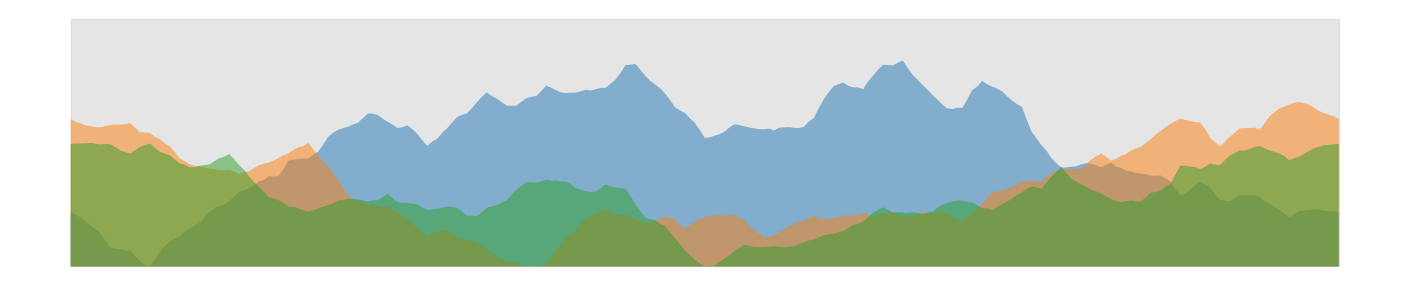

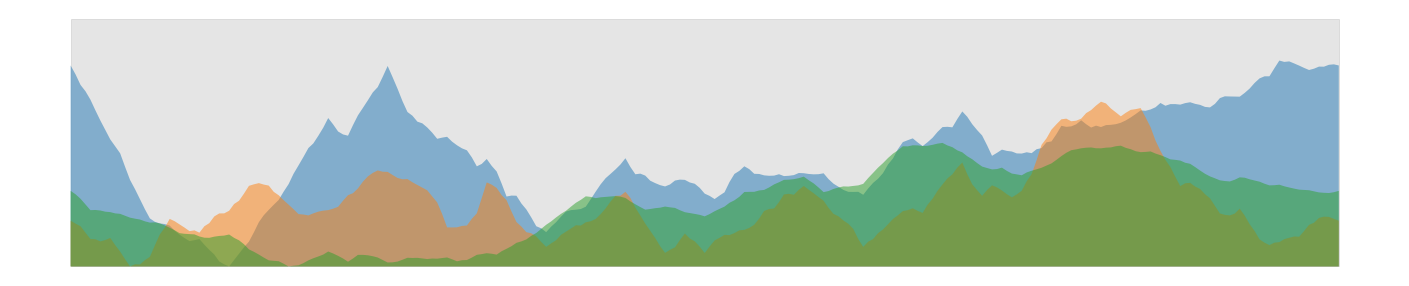

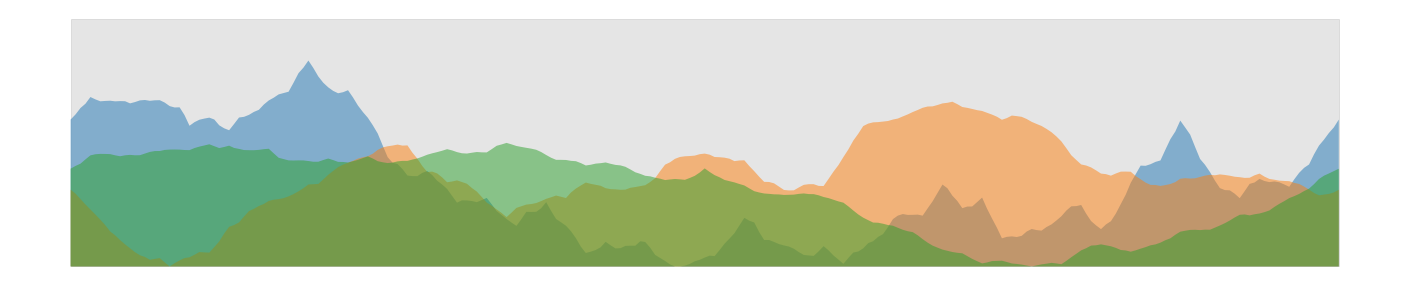

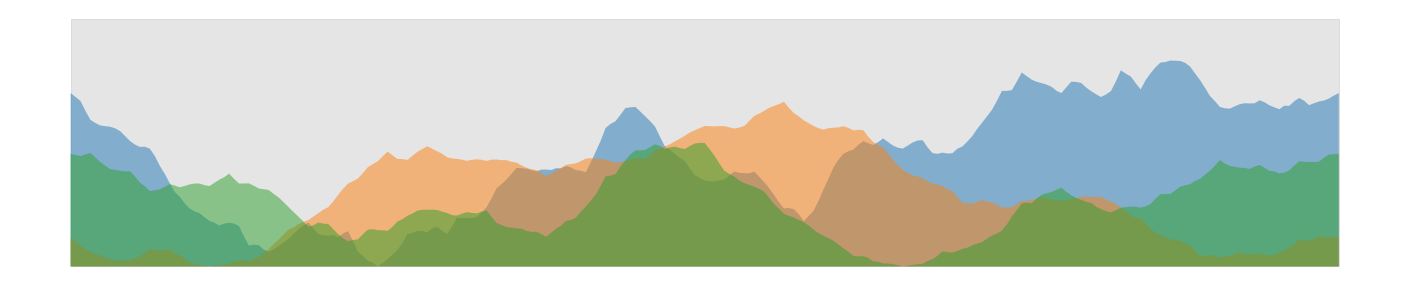

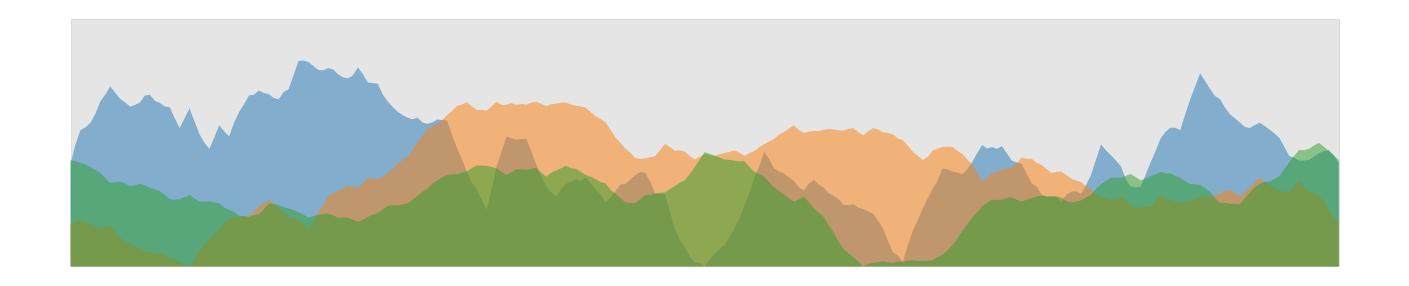

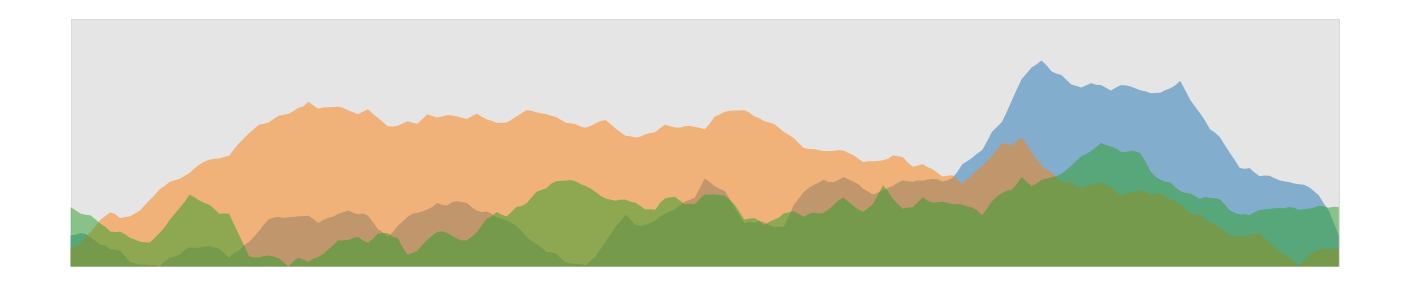

In [12]:
NL = 3  # number of lines
NT = 8  # number of refinement

for k in range(6):
    x,Y = run(NL,NT)
    plot_fractals(NL,x,Y)
    print();print();print();print();print();
